In [7]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Orig=True
t = 0.8
temperature = [t]*6
top_p = [
    0.6, 0.7,
    0.8, 0.9, 0.95,
    0.97
]

pass_at_1 = [
    35.76, 34.50,
    33.01, 31.26, 29.01,
    26.50
]
pass_at_10 = [
    62.19, 63.73,
    65.29, 64.89, 64.50,
    58.01
]
pass_at_100 = [
    76.26, 78.21,
    81.03, 83.83, 84.29,
    73.70
]

In [9]:
# YES
t = 0.8
temperature = [t]*6

top_p = [
    0.6, 0.7,
    0.8, 0.9, 0.95,
    0.97
]

pass_at_1 = [
    35.76, 34.87,
    34.01, 31.26, 29.01,
    26.50
]
pass_at_10 = [
    62.19, 63.73,
    65.29, 64.89, 63.50,
    58.01
]
pass_at_100 = [
    76.26, 77.21,
    80.03, 81.23, 82.29,
    75.70
]

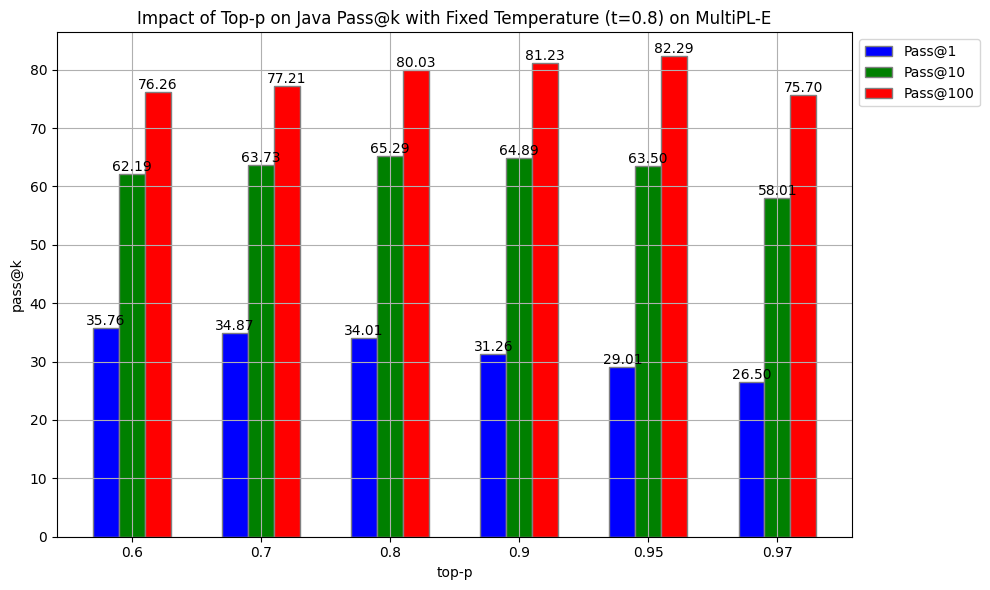

In [10]:
import matplotlib.pyplot as plt
import numpy as np

top_k=0
num_return_sequences = 10

# Plotting
bar_width = 0.2
r1 = np.arange(len(top_p))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10,6))

# Plot bars for Pass@1, Pass@10, Pass@100
plt.bar(r1, pass_at_1, color='blue', width=bar_width, edgecolor='grey', label='Pass@1')
plt.bar(r2, pass_at_10, color='green', width=bar_width, edgecolor='grey', label='Pass@10')
plt.bar(r3, pass_at_100, color='red', width=bar_width, edgecolor='grey', label='Pass@100')

# Loop through bars to add values at the top
for i in range(len(pass_at_1)):
    plt.text(r1[i], pass_at_1[i] + 0.5, f'{pass_at_1[i]:.2f}', ha='center')
    plt.text(r2[i], pass_at_10[i] + 0.5, f'{pass_at_10[i]:.2f}', ha='center')
    plt.text(r3[i], pass_at_100[i] + 0.5, f'{pass_at_100[i]:.2f}', ha='center')

# Add labels and ticks
plt.xlabel('top-p')
plt.xticks([r + bar_width for r in range(len(top_p))], top_p)

plt.ylabel("pass@k")

plt.title(
    f"Impact of Top-p on Java Pass@k with Fixed Temperature (t={t}) on MultiPL-E")

plt.grid(True)

# Adjust legend location and plot layout to avoid hiding the last bar
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Adjust the right padding to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.tight_layout()
# plt.show()

# # Set x and y ticks step
# plt.xticks(np.arange(0.1, 1.1, 0.1))
# plt.yticks(np.arange(20, 90, 5))

plt.savefig(f"Java pass@k t{t} vs p (bar chart).jpg", format="jpg", dpi=1024)

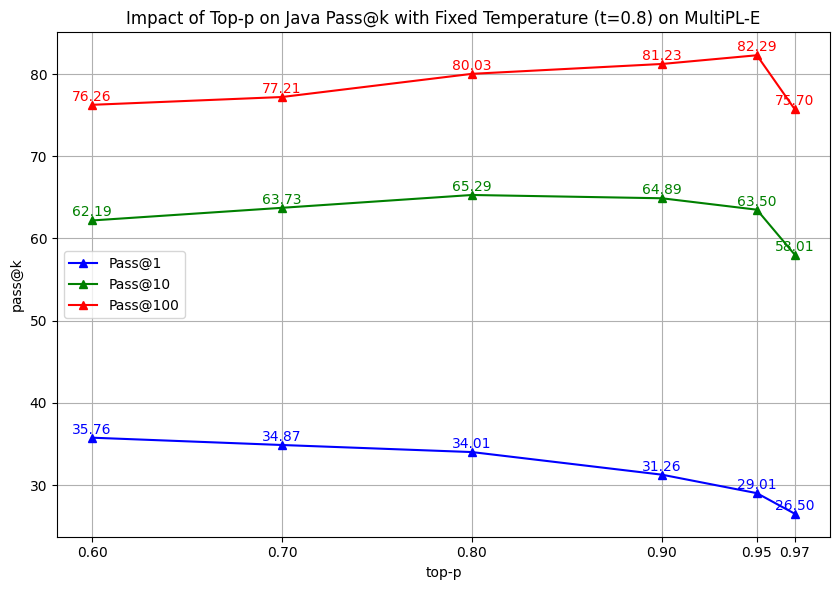

In [11]:

import matplotlib.pyplot as plt
import numpy as np

top_k = 0
num_return_sequences = 10

plt.figure(figsize=(10, 6))

# Plot lines for Pass@1, Pass@10, Pass@100
plt.plot(top_p, pass_at_1, color='blue', marker='^', label='Pass@1')
plt.plot(top_p, pass_at_10, color='green', marker='^', label='Pass@10')
plt.plot(top_p, pass_at_100, color='red', marker='^', label='Pass@100')

# Loop through points to add values on top of each point
for i in range(len(top_p)):
    plt.text(top_p[i], pass_at_1[i] + 0.5, f'{pass_at_1[i]:.2f}', ha='center', color='blue')
    plt.text(top_p[i], pass_at_10[i] + 0.5, f'{pass_at_10[i]:.2f}', ha='center', color='green')
    plt.text(top_p[i], pass_at_100[i] + 0.5, f'{pass_at_100[i]:.2f}', ha='center', color='red')

# Labels and title
plt.xlabel('top-p')
plt.ylabel('pass@k')
plt.title(
    f"Impact of Top-p on Java Pass@k with Fixed Temperature (t={t}) on MultiPL-E")

plt.xticks(top_p)

# Legend and layout adjustments
plt.grid(True)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='center left')
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save figure
plt.savefig(f"Java pass@k t{t} vs p.jpg", format="jpg", dpi=1024)